In [1]:
from matplotlib import pyplot
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import time
import re
from ipaddress import ip_address
from urllib.parse import urlparse
import json
import isodate
from dateutil import parser
from dateutil import tz
from pyspark.sql.types import StructField, StructType, StringType
from pyspark.sql import Row
from pyspark.sql import functions as pyspark_function
from urllib.request import urlopen
import subprocess
import os.path
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import mktime
import time
from datetime import date, timedelta, datetime, tzinfo

In [2]:
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


        
spark = SparkSession \
        .builder \
        .appName("Test Spark") \
        .config("spark.jars", "/opt/postgresql-42.4.0.jar") \
        .config("spark.num.executors"," 16")  \
        .config("spark.executor.cores", "8") \
        .config("spark.executor.memory", "20g") \
        .config("spark.scheduler.mode", "FAIR") \
        .config("spark.sql.autoBroadcastJoinThreshold", -1) \
        .master("spark://131.225.58.251:7077") \
        .getOrCreate() \



#spark.conf.set("spark.executor.memory", "20g")
#spark.conf.set("spark.executor.cores", "8")

22/07/29 23:42:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/07/29 23:42:17 WARN FairSchedulableBuilder: Fair Scheduler configuration file not found so jobs will be scheduled in FIFO order. To use fair scheduling, configure pools in fairscheduler.xml or set spark.scheduler.allocation.file to a file that contains the configuration.


In [4]:
billinginfo = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "(select *, split_part(storageclass, '.', 1) as vo from billinginfo where datestamp between '2022-03-01 00:00:00' and '2022-06-30 23:59:59' and isnew is false and errorcode = 0 and exists (select 1 from storageinfo where pnfsid = billinginfo.pnfsid and datestamp between '2022-01-01 00:00:00' and '2022-06-30 23:59:59' )) as foo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "16") \
     .option("partitionColumn", "datestamp") \
     .option("lowerBound", "2022-03-01 00:00:00") \
     .option("upperBound", "2022-06-30 23:59:59") \
     .option("fetchsize", 1000000) \
     .load()
billinginfo.printSchema()

root
 |-- client: string (nullable = true)
 |-- initiator: string (nullable = true)
 |-- isnew: boolean (nullable = true)
 |-- protocol: string (nullable = true)
 |-- transfersize: long (nullable = true)
 |-- fullsize: long (nullable = true)
 |-- storageclass: string (nullable = true)
 |-- connectiontime: long (nullable = true)
 |-- action: string (nullable = true)
 |-- cellname: string (nullable = true)
 |-- datestamp: timestamp (nullable = true)
 |-- errorcode: integer (nullable = true)
 |-- errormessage: string (nullable = true)
 |-- pnfsid: string (nullable = true)
 |-- transaction: string (nullable = true)
 |-- p2p: boolean (nullable = true)
 |-- fqan: string (nullable = true)
 |-- mappeduid: integer (nullable = true)
 |-- mappedgid: integer (nullable = true)
 |-- owner: string (nullable = true)
 |-- vo: string (nullable = true)



In [5]:
import time
t0 = time.time()
print("Number of entries is    =====> ", billinginfo.count(), " Time to execute ", time.time()-t0)

22/07/30 03:35:00 WARN TaskSetManager: Lost task 1.0 in stage 0.0 (TID 1) (131.225.161.153 executor 13): org.postgresql.util.PSQLException: An I/O error occurred while sending to the backend.
	at org.postgresql.core.v3.QueryExecutorImpl.execute(QueryExecutorImpl.java:383)
	at org.postgresql.jdbc.PgStatement.executeInternal(PgStatement.java:490)
	at org.postgresql.jdbc.PgStatement.execute(PgStatement.java:408)
	at org.postgresql.jdbc.PgPreparedStatement.executeWithFlags(PgPreparedStatement.java:181)
	at org.postgresql.jdbc.PgPreparedStatement.executeQuery(PgPreparedStatement.java:133)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD.compute(JDBCRDD.scala:314)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at

22/07/30 03:35:00 WARN TaskSetManager: Lost task 4.0 in stage 0.0 (TID 4) (131.225.161.156 executor 8): TaskKilled (Stage cancelled)
22/07/30 03:35:00 WARN TaskSetManager: Lost task 15.0 in stage 0.0 (TID 15) (131.225.161.162 executor 2): TaskKilled (Stage cancelled)
22/07/30 03:35:00 WARN TaskSetManager: Lost task 6.0 in stage 0.0 (TID 6) (131.225.161.149 executor 0): TaskKilled (Stage cancelled)
22/07/30 03:35:00 WARN TaskSetManager: Lost task 3.0 in stage 0.0 (TID 3) (131.225.161.161 executor 14): TaskKilled (Stage cancelled)
22/07/30 03:35:00 WARN TaskSetManager: Lost task 11.0 in stage 0.0 (TID 11) (131.225.161.157 executor 10): TaskKilled (Stage cancelled)
22/07/30 03:35:00 WARN TaskSetManager: Lost task 13.0 in stage 0.0 (TID 13) (131.225.161.155 executor 6): TaskKilled (Stage cancelled)
22/07/30 03:35:01 WARN TaskSetManager: Lost task 12.0 in stage 0.0 (TID 12) (131.225.161.158 executor 3): TaskKilled (Stage cancelled)
22/07/30 03:35:01 WARN TaskSetManager: Lost task 7.0 in sta

Py4JJavaError: An error occurred while calling o50.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 14 in stage 0.0 failed 4 times, most recent failure: Lost task 14.3 in stage 0.0 (TID 26) (131.225.161.151 executor 12): org.postgresql.util.PSQLException: FATAL: the database system is in recovery mode
	at org.postgresql.core.v3.ConnectionFactoryImpl.doAuthentication(ConnectionFactoryImpl.java:646)
	at org.postgresql.core.v3.ConnectionFactoryImpl.tryConnect(ConnectionFactoryImpl.java:180)
	at org.postgresql.core.v3.ConnectionFactoryImpl.openConnectionImpl(ConnectionFactoryImpl.java:235)
	at org.postgresql.core.ConnectionFactory.openConnection(ConnectionFactory.java:49)
	at org.postgresql.jdbc.PgConnection.<init>(PgConnection.java:223)
	at org.postgresql.Driver.makeConnection(Driver.java:402)
	at org.postgresql.Driver.connect(Driver.java:261)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.BasicConnectionProvider.getConnection(BasicConnectionProvider.scala:49)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.ConnectionProviderBase.create(ConnectionProvider.scala:102)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1(JdbcDialects.scala:122)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1$adapted(JdbcDialects.scala:118)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD.compute(JDBCRDD.scala:273)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.postgresql.util.PSQLException: FATAL: the database system is in recovery mode
	at org.postgresql.core.v3.ConnectionFactoryImpl.doAuthentication(ConnectionFactoryImpl.java:646)
	at org.postgresql.core.v3.ConnectionFactoryImpl.tryConnect(ConnectionFactoryImpl.java:180)
	at org.postgresql.core.v3.ConnectionFactoryImpl.openConnectionImpl(ConnectionFactoryImpl.java:235)
	at org.postgresql.core.ConnectionFactory.openConnection(ConnectionFactory.java:49)
	at org.postgresql.jdbc.PgConnection.<init>(PgConnection.java:223)
	at org.postgresql.Driver.makeConnection(Driver.java:402)
	at org.postgresql.Driver.connect(Driver.java:261)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.BasicConnectionProvider.getConnection(BasicConnectionProvider.scala:49)
	at org.apache.spark.sql.execution.datasources.jdbc.connection.ConnectionProviderBase.create(ConnectionProvider.scala:102)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1(JdbcDialects.scala:122)
	at org.apache.spark.sql.jdbc.JdbcDialect.$anonfun$createConnectionFactory$1$adapted(JdbcDialects.scala:118)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCRDD.compute(JDBCRDD.scala:273)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:

billinginfo.createOrReplaceTempView("billing")
billinginfo.cache()

In [ ]:
storageinfo = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "(select *, split_part(storageclass, '.', 1) as vo  from storageinfo where datestamp between '2022-01-01 00:00:00' and '2022-06-30 23:59:59' and action = 'restore' and errorcode = 0) as foo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "16") \
     .option("partitionColumn", "datestamp") \
     .option("lowerBound", "2022-01-01 00:00:00") \
     .option("upperBound", "2022-06-30 23:59:59") \
     .option("fetchsize", 1000000) \
     .load()

storageinfo.printSchema()

In [ ]:
print("Count is ", storageinfo.count())
storageinfo.createOrReplaceTempView("storage")
storageinfo.cache()


In [ ]:
df_reads = spark.sql("select count(*) as reads, vo from billing where p2p is false group by vo")
df_reads.show()

In [22]:
# Now we need to obtains counts by vo: 

#df_reads = spark.sql("select count(*) as reads, vo from billing group by vo")
#df_reads.show()


In [ ]:
df_restores = spark.sql("select count(*) as restores, vo from storage group by vo")
df_restores.show()

In [ ]:
# can we do this?:
df_reads.createOrReplaceTempView("billing_reads")
df_reads.cache()
df_restores.createOrReplaceTempView("storage_restores")
df_restores.cache()


In [32]:
#df1 = billing_reads.withColumn('Ratio', billing_reads.select('reads') / storage_restores.select('restores'))
#df1 = df_reads.withColumn('Ratio', coalesce(col('reads'), lit(0)) / coalesce(col('restores'), lit(1)))

In [ ]:
# now we can :
result = spark.sql("select b.reads / s.restores as average_reads_per_restore, b.vo from billing_reads b, storage_restores s where s.vo = b.vo")

In [ ]:
result2 = spark.sql("select b.reads / s.restores as average_reads_per_restore, b.vo from billing_reads b, storage_restores s where s.vo = b.vo and b.reads / s.restores between 0.5 and 1.5 ")
result2.show()
pd2=result2.toPandas()
pd2=pd2.sort_values(by=['average_reads_per_restore'], ascending=False)
pd2.plot(x= 'vo', kind = 'bar', figsize=(24,12))
plt.savefig('reads_per_each_restore_by_VO_ratio_close_to_1.png' ,fontsize=24)

In [ ]:
result.show()

In [ ]:
pd=result.toPandas()
print(pd)

In [ ]:
pd=pd.sort_values(by=['average_reads_per_restore'], ascending=False)
print(pd)

In [ ]:
pd.plot(x= 'vo', kind = 'bar', figsize=(24,12))
plt.savefig('reads_per_each_restore_by_VO_6_months.png' ,fontsize=24)

<AxesSubplot:xlabel='vo'>

/tmp/ipykernel_21798/3687821463.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('reads_per_each_restore_by_VO.png' ,fontsize=24)


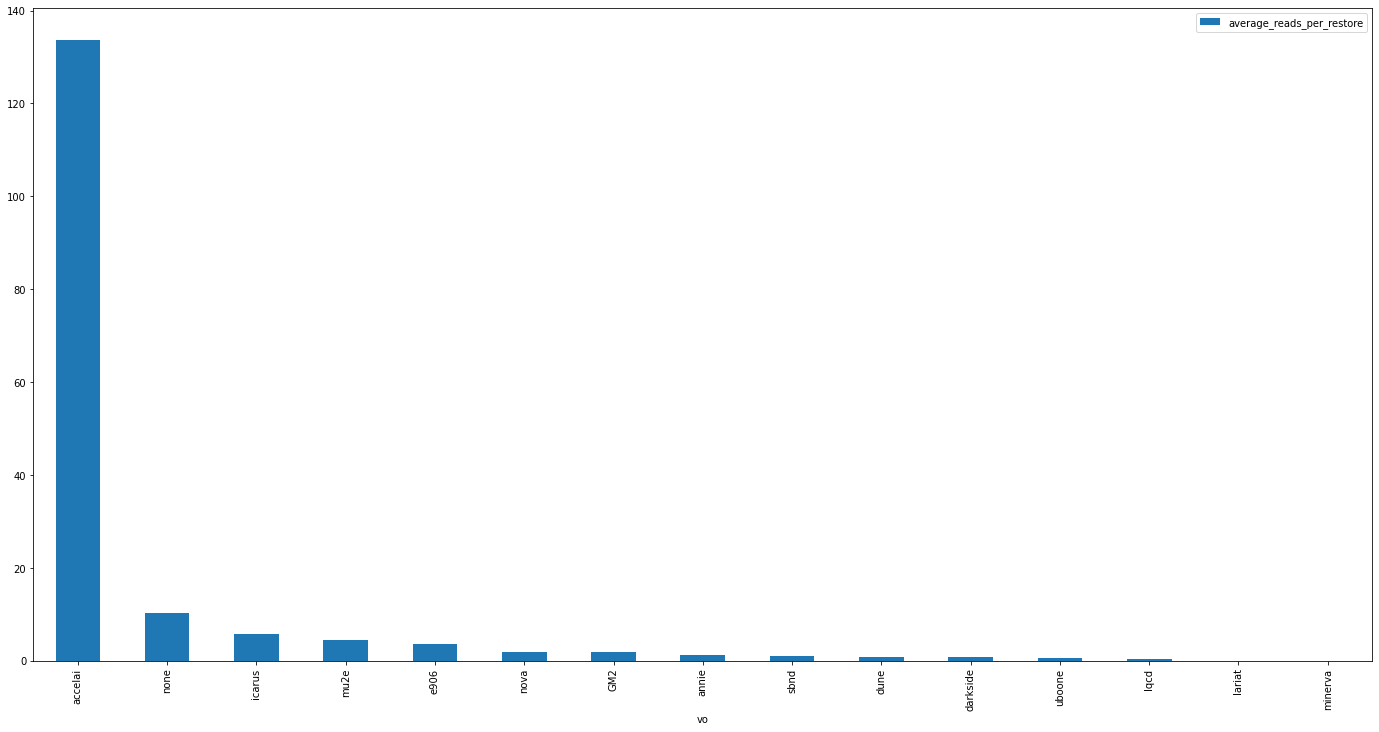

In [20]:
pd.plot(x= 'vo', kind = 'bar', figsize=(24,12))
plt.savefig('reads_per_each_restore_by_VO.png' ,fontsize=24)

In [ ]:
pd.plot(x= 'vo', kind = 'bar', figsize=(24,12))
plt.savefig('reads_per_each_restore_by_VO_6_months.png' ,fontsize=24)

In [16]:
df_read5= spark.sql("select count(*) from storage where datestamp > '2022-06-01 00:00:00' and vo = 'accelai' and errorcode = 0 and action = 'restore' ; ")
df_read5.show()



+--------+
|count(1)|
+--------+
|       4|
+--------+



In [19]:
df5=spark.sql("select count(*) from billing where datestamp > '2022-06-01 00:00:00' and vo = 'accelai' and errorcode = 0 and isnew is false and p2p is false;")
df5.show()





+--------+
|count(1)|
+--------+
|     535|
+--------+



In [ ]:
#df_merged['client','pnfsid'].show()